In [1]:
from pfio import pfread
import numpy as np
from glob import glob
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import time

start_time = time.time()

In [2]:
def get_file_list(file_pattern, input_file_path='.'):
    # generate the list of input files
    input_files = sorted(glob(os.path.join(input_file_path, file_pattern)))
    return input_files

In [3]:
forcings_folder = '/scratch/arezaii/WRF/wy2015'
wrf_pattern = 'WRF.APCP.*.pfb'

In [4]:
forcing_files = get_file_list(wrf_pattern, forcings_folder )

In [5]:
%time days = np.concatenate([pfread(forcing_file) for forcing_file in forcing_files])

CPU times: user 2min 42s, sys: 56.6 s, total: 3min 39s
Wall time: 3min 52s


In [6]:
num_days = len(forcing_files)
num_x = days.shape[2]
num_y = days.shape[1]

In [7]:
x_coords = range(0,num_x)
y_coords = range(0,num_y)
time_coords = pd.date_range('2014-10-01', periods=(num_days*24), freq='H')

In [8]:
%time data = xr.DataArray(days, dims=('time','y','x',), coords={'x':x_coords, 'y':y_coords,'time': time_coords })
data.attrs['long_name'] = 'precipitation'
data.attrs['units'] = 'mm/hr'

CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.59 ms


In [9]:
data

<xarray.DataArray (time: 8760, y: 736, x: 704)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.10628095e-01,  9.24489241e-02,  7.48296272e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.78818717e-01,  1.57521196e-01,  1.37472380e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.55354249e-01,  2.21646756e-01,  1.98931265e-01]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  1.92433717e-07,  3.10463143e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          6.46789332e-08,  4.84703722e-07,  8.08165953e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          7.17453316e-07,  8.80860914e-07,  1.40247627e-06]],

       ...,

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.9990000

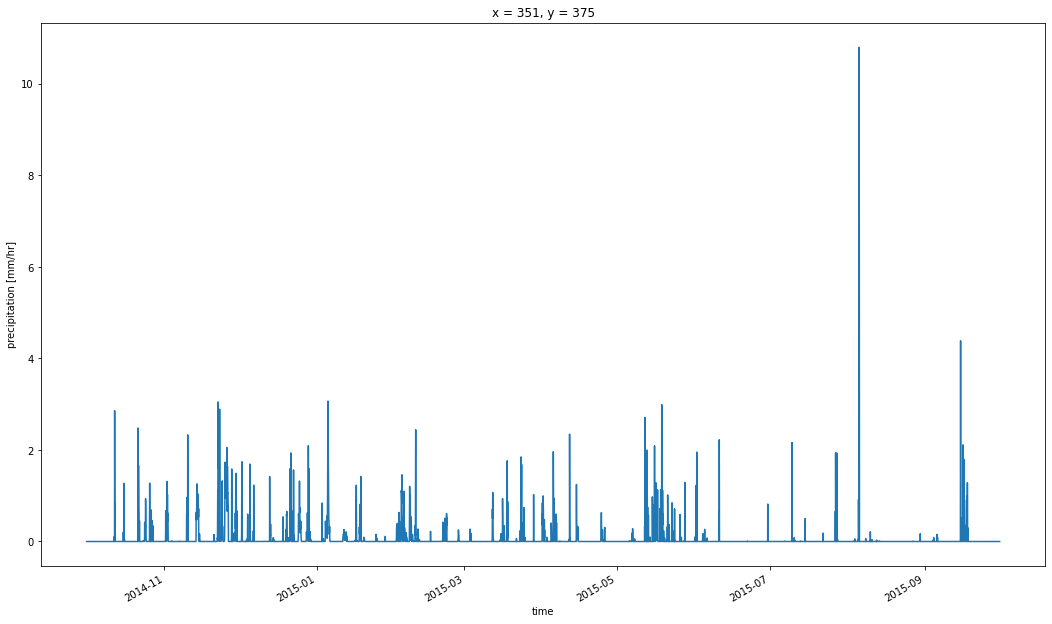

In [10]:
data[:,375,351].plot(figsize=(18,10))

In [11]:
%time data[:,375,351].mean(dim='time', keep_attrs=True)

CPU times: user 2.64 ms, sys: 0 ns, total: 2.64 ms
Wall time: 2.05 ms


<xarray.DataArray ()>
array(0.05544615)
Coordinates:
    x        int64 351
    y        int64 375
Attributes:
    long_name:  precipitation
    units:      mm/hr

In [12]:
%time day_avg = data[:,375,351].groupby("time.dayofyear").mean(dim='time', keep_attrs=True)

CPU times: user 114 ms, sys: 8 ms, total: 122 ms
Wall time: 121 ms


In [13]:
day_avg

<xarray.DataArray (dayofyear: 365)>
array([0.00000000e+00, 3.58927430e-06, 8.40396857e-02, 1.75213112e-01,
       1.04336812e+00, 4.40415750e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.57644315e-02, 7.56846583e-02,
       6.18636888e-03, 0.00000000e+00, 0.00000000e+00, 2.00701486e-01,
       2.65601592e-03, 2.47061713e-01, 1.53195715e-02, 6.52385617e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.32834260e-02,
       4.98445259e-03, 0.00000000e+00, 0.00000000e+00, 1.30789842e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.79585183e-02,
       7.21882595e-02, 2.72729993e-01, 3.52471550e-01, 8.69763915e-02,
       4.48446044e-03, 3.73054299e-01, 1.12422595e-02, 2.92711309e-01,
       3.23641424e-02, 3.57120728e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.03166984e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.40663177e-02, 2.34282877e-01,
       6.48022057e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.61582254e-02, 1.07718500e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.88738063e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.94507075e-01, 0.00000000e+00,
       0.00000000e+00, 3.63928079e-02, 1.13245618e-01, 3.10817904e-02,
       1.79991395e-01, 0.00000000e+00, 0.00000000e+00, 4.47424713e-03,
       0.00000000e+00, 2.49561299e-01, 1.07214400e-01, 8.06710067e-03,
       0.00000000e+00, 0.00000000e+00, 4.88422912e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.14687860e-01, 2.00628470e-02,
       9.76633410e-05, 3.92461883e-02, 3.52100017e-01, 1.40895485e-01,
       0.00000000e+00, 4.69141704e-04, 0.00000000e+00, 0.00000000e+00,
       5.22042662e-03, 1.65094362e-01, 0.00000000e+00, 1.31324240e-01,
       6.20214786e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.10543779e-01, 3.91579726e-02, 4.38874837e-02,
       6.14875238e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.97091685e-05,
       1.69307653e-04, 2.03077407e-02, 2.28992226e-02, 3.37107070e-03,
       0.00000000e+00, 0.00000000e+00, 9.92939859e-06, 1.83988127e-01,
       1.40332575e-01, 5.51415426e-03, 1.87726242e-01, 3.65577204e-01,
       1.11300887e-01, 4.20834320e-01, 1.61777266e-01, 6.40157931e-03,
       1.12620913e-01, 4.37068077e-03, 9.56334600e-02, 3.10211307e-02,
       3.85540824e-06, 3.28598120e-02, 9.33115439e-04, 1.10764176e-01,
       0.00000000e+00, 0.00000000e+00, 8.01074659e-05, 1.51085960e-01,
       0.00000000e+00, 3.07164904e-05, 1.17916996e-02, 2.05932499e-02,
       3.26326437e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.54422458e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.01731402e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.41803656e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.88306434e-04, 2.48607890e-04,
       0.00000000e+00, 2.02539435e-01, 1.13783557e-02, 1.14858757e-03,
       2.00948296e-05, 9.25847944e-04, 0.00000000e+00, 2.48149064e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.51948939e-06,
       0.00000000e+00, 0.00000000e+00, 8.20989613e-03, 1.58903682e-05,
       4.74856466e-05, 0.00000000e+00, 0.00000000e+00, 3.46374817e-01,
       2.11102379e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.45310681e-03, 4.48468005e-03,
       8.36964446e-01, 1.92538712e-06, 0.00000000e+00, 4.34239097e-03,
       0.00000000e+00, 1.14749690e-02, 1.15125707e-03, 2.22

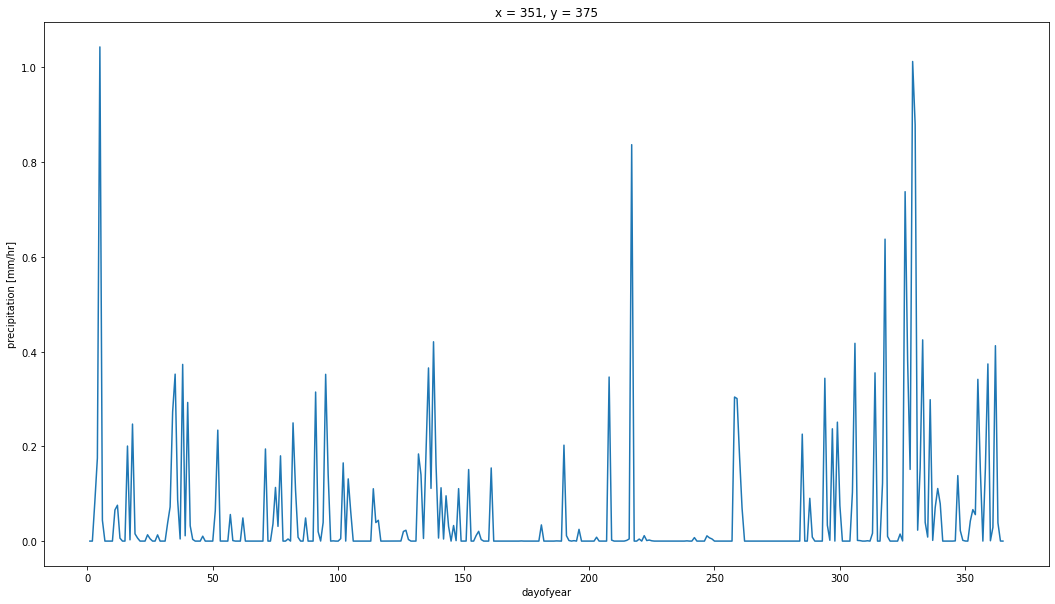

In [14]:
day_avg.plot(figsize=(18,10))

In [15]:
end_time = time.time()
end_time - start_time

233.08446669578552